In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import integrate
from matplotlib import pyplot as plt


In [2]:
# Simulation data
# The simulation data contains two parts:
#     A) the raw signals, this is the flows through the boundaries form the simulation code.
#     B) Dakota stats. We use Sandia's Dakota for the LHS and the PCE, so I need to read Dakota's Table and clean things up.
#
# There are six validation points and therefore six packs of data. The six validation points are combination of three vairalbes.
# These three variables are: ejection fraction (EF), heart rate (HR) and pump speed (speed)
# The pump speed is characterised through A_VAD and B_VAD. The pump speed parameters. There are three pump speeds 0k[rpm], 8k[rpm] and 11k[rpm]
# CSmed has EF=~22% and HR=~68.5.
# CS11  has EF=~17% and HR=~61.2

##
#CSmed - 0k [rpm]
##
#signals
allflo_csmed0k= pd.read_csv('rawdata_numerical/EF21_68bpm_0k/allflo.csv', header=0, delim_whitespace=True,skiprows=0, index_col=0)#, names=columns)
#Dakota stats
columns=["interface",  "HR", "EF", "DENSI", "VISCO",  "$P_{LA}$", "$R^{Ao}_P$", "$C^{Ao}_P$", "$R^{Ao}_S$", "${Q}^{avg}_{Ao}$", "${Q}^{max}_{Ao}$", "$Q^{FF}_{Ao}$", "${Q}^{avg}_{VAD}$", "${Q}^{max}_{VAD}$", "${Q}^{avg}_{M}$", "${Q}^{max}_{M}$", "$Q_{RAT}$"]
dk_csm0k_raw= pd.read_csv('rawdata_numerical/EF21_68bpm_0k/dakotacsmed_0k_lhs.tab', header=0, delim_whitespace=True,skiprows=0, index_col=0, names=columns)
dk_csm0k_raw.drop(columns=["interface", "DENSI", "VISCO","$P_{LA}$", "$R^{Ao}_P$", "$C^{Ao}_P$", "$R^{Ao}_S$"],inplace=True)
dk_csm0k=dk_csm0k_raw.copy()
dk_csm0k["$B_{VAD}$"]=0.0
dk_csm0k["$A_{VAD}$"]=0.0
dk_csm0k["source"]="num"
dk_csm0k["conf"]="CS_med"
dk_csm0k["speed"]=0

##
#CSmed - 8k [rpm]
##
#signals
allflo_csmed8k= pd.read_csv('rawdata_numerical/EF21_68bpm_8k/allflo.csv', header=0, delim_whitespace=True,skiprows=0, index_col=0)#, names=columns)
allflo_csmed8k.drop(columns=["Ao_1.1","VAD_1.1","Ao_1.2","VAD_1.2"], inplace=True)
#Dakota stats
columns=["interface", "$B_{VAD}$", "$A_{VAD}$", "HR", "EF", "DENSI", "VISCO", "PUMPA", "$P_{LA}$", "$R^{Ao}_P$", "$C^{Ao}_P$", "$R^{Ao}_S$", "${Q}^{avg}_{Ao}$", "${Q}^{max}_{Ao}$", "${Q}^{avg}_{VAD}$", "${Q}^{max}_{VAD}$", "${Q}^{avg}_{M}$", "${Q}^{max}_{M}$", "$Q_{RAT}$", "$Q^{FF}_{Ao}$"]
dk_csm8k_raw= pd.read_csv('rawdata_numerical/EF21_68bpm_8k/dakota.tab', header=0, delim_whitespace=True,skiprows=0, index_col=0, names=columns)
dk_csm8k_raw.drop(columns=["interface", "DENSI", "VISCO", "PUMPA", "$P_{LA}$", "$R^{Ao}_P$", "$C^{Ao}_P$", "$R^{Ao}_S$"],inplace=True)
dk_csm8k=dk_csm8k_raw.copy()
dk_csm8k["source"]="num"
dk_csm8k["conf"]="CS_med"
dk_csm8k["speed"]=8000

##
#CSmed - 11k [rpm]
##
#signals
allflo_csmed11k= pd.read_csv('rawdata_numerical/EF21_68bpm_11k/allflo.csv', header=0, delim_whitespace=True,skiprows=0, index_col=0)#, names=columns)
#Dakota stats
columns=["interface", "$B_{VAD}$", "$A_{VAD}$", "HR", "EF", "DENSI", "VISCO", "PUMPA", "$P_{LA}$", "$R^{Ao}_P$", "$C^{Ao}_P$", "$R^{Ao}_S$", "${Q}^{avg}_{Ao}$", "${Q}^{max}_{Ao}$", "$Q^{FF}_{Ao}$", "${Q}^{avg}_{VAD}$", "${Q}^{max}_{VAD}$", "${Q}^{avg}_{M}$", "${Q}^{max}_{M}$", "$Q_{RAT}$"]
dk_csm11k_raw= pd.read_csv('rawdata_numerical/EF21_68bpm_11k/dakota.tab', header=0, delim_whitespace=True,skiprows=0, index_col=0, names=columns)
dk_csm11k_raw.drop(columns=["interface", "DENSI", "VISCO", "PUMPA", "$P_{LA}$", "$R^{Ao}_P$", "$C^{Ao}_P$", "$R^{Ao}_S$"],inplace=True)
dk_csm11k=dk_csm11k_raw.copy()
dk_csm11k["source"]="num"
dk_csm11k["conf"]="CS_med"
dk_csm11k["speed"]=11000

##
#CS11 - 0k [rpm]
##
#signals
allflo_cs110k= pd.read_csv('rawdata_numerical/EF17_61bpm_0k/allflo.csv', header=0, delim_whitespace=True,skiprows=0, index_col=0)#, names=columns)
#Dakota stats
columns=["interface",  "HR", "EF", "DENSI", "VISCO",  "$P_{LA}$", "$R^{Ao}_P$", "$C^{Ao}_P$", "$R^{Ao}_S$", "${Q}^{avg}_{Ao}$", "${Q}^{max}_{Ao}$", "$Q^{FF}_{Ao}$", "${Q}^{avg}_{VAD}$", "${Q}^{max}_{VAD}$", "${Q}^{avg}_{M}$", "${Q}^{max}_{M}$", "$Q_{RAT}$"]
dk_cs110k_raw= pd.read_csv('rawdata_numerical/EF17_61bpm_0k/dakotacs11_0k_lhs.tab', header=0, delim_whitespace=True,skiprows=0, index_col=0, names=columns)
dk_cs110k_raw.drop(columns=["interface", "DENSI", "VISCO","$P_{LA}$", "$R^{Ao}_P$", "$C^{Ao}_P$", "$R^{Ao}_S$"],inplace=True)
dk_cs110k=dk_cs110k_raw.copy()
dk_cs110k["$B_{VAD}$"]=0.0
dk_cs110k["$A_{VAD}$"]=0.0
dk_cs110k["source"]="num"
dk_cs110k["conf"]="CS_11"
dk_cs110k["speed"]=0

##
#CS11 - 8k [rpm]
##
#signals
allflo_cs118k= pd.read_csv('rawdata_numerical/EF17_61bpm_8k/allflo.csv', header=0, delim_whitespace=True,skiprows=0, index_col=0)#, names=columns)
#Dakota stats
columns=["interface", "$B_{VAD}$", "$A_{VAD}$", "HR", "EF", "DENSI", "VISCO", "PUMPA", "$R^{Ao}_P$", "$C^{Ao}_P$", "$R^{Ao}_S$", "$P_{LA}$",  "${Q}^{max}_{Ao}$", "${Q}^{avg}_{Ao}$", "${Q}^{avg}_{VAD}$", "${Q}^{max}_{VAD}$", "${Q}^{avg}_{M}$", "${Q}^{max}_{M}$"]
dk_cs118k_raw= pd.read_csv('rawdata_numerical/EF17_61bpm_8k/dakota.tab', header=0, delim_whitespace=True,skiprows=0, index_col=0, names=columns)
dk_cs118k_raw.drop(columns=["interface", "DENSI", "VISCO","$P_{LA}$", "$R^{Ao}_P$", "$C^{Ao}_P$", "$R^{Ao}_S$"],inplace=True)
dk_cs118k=dk_cs118k_raw.copy()
dk_cs118k["source"]="num"
dk_cs118k["conf"]="CS_11"
dk_cs118k["speed"]=8000

##
#CS11 - 11k [rpm]
##
#signals
allflo_cs1111k= pd.read_csv('rawdata_numerical/EF17_61bpm_11k/allflo.csv', header=0, delim_whitespace=True,skiprows=0, index_col=0)#, names=columns)
#Dakota stats
columns=["interface", "$B_{VAD}$", "$A_{VAD}$", "HR", "EF", "DENSI", "VISCO", "PUMPA", "$R^{Ao}_P$", "$C^{Ao}_P$", "$R^{Ao}_S$", "$P_{LA}$",  "${Q}^{max}_{Ao}$", "${Q}^{avg}_{Ao}$", "${Q}^{avg}_{VAD}$", "${Q}^{max}_{VAD}$", "${Q}^{avg}_{M}$", "${Q}^{max}_{M}$"]
dk_cs1111k_raw= pd.read_csv('rawdata_numerical/EF17_61bpm_11k/dakota.tab', header=0, delim_whitespace=True,skiprows=0, index_col=0, names=columns)
dk_cs1111k_raw.drop(columns=["interface", "DENSI", "VISCO","$P_{LA}$", "$R^{Ao}_P$", "$C^{Ao}_P$", "$R^{Ao}_S$"],inplace=True)
dk_cs1111k=dk_cs1111k_raw.copy()
dk_cs1111k["source"]="num"
dk_cs1111k["conf"]="CS_11"
dk_cs1111k["speed"]=11000

In [3]:
#Subroutine that  organises the raw data into a matrix with the data
def pack_beats(df_stats, df_flows, normalise_time=True):
    tvecs=[]
    bvecs=[]
    meanAo=pd.DataFrame()
    meanVAD=pd.DataFrame()
    for run in range(1,int(len(df_flows.columns)/2+1)):
        period=60/df_stats["HR"][run]
        tin=np.floor(df_flows.index[-1]/period-2)*period
        itin=df_flows.index.searchsorted(tin)
        tin=df_flows.index[itin]

        tfin=(np.floor(df_flows.index[-1]/period))*period
        itfin=df_flows.index.searchsorted(tfin)
        tfin=df_flows.index[itfin-1]
        tvecs.append(df_flows[tin:tfin].index.values)
        bvecs.append(df_flows[f"Ao_{run}"][(df_flows.index>=tin) & (df_flows.index<=tfin)].to_frame())
        bvecs[run-1][f"VAD_{run}"]=df_flows[f"VAD_{run}"][(df_flows.index>=tin) & (df_flows.index<=tfin)]
        bvecs[run-1].index=bvecs[run-1].index-tin
        
        if normalise_time:
            bvecs[run-1].index=2*bvecs[run-1].index/bvecs[run-1].index[-1]
        
        meanAo=pd.concat([meanAo,bvecs[run-1][f"Ao_{run}"]],axis=1)
        meanVAD=pd.concat([meanVAD,bvecs[run-1][f"VAD_{run}"]],axis=1)
        
    return bvecs, meanAo, meanVAD

In [4]:
beats_csm0k, meanAo_csm0k, meanVAD_csm0k = pack_beats(dk_csm0k,allflo_csmed0k, True)
beats_csm8k, meanAo_csm8k, meanVAD_csm8k = pack_beats(dk_csm8k,allflo_csmed8k, True)
beats_csm11k, meanAo_csm11k, meanVAD_csm11k = pack_beats(dk_csm11k,allflo_csmed11k, True)
beats_cs110k, meanAo_cs110k, meanVAD_cs110k = pack_beats(dk_cs110k,allflo_cs110k, True)
beats_cs118k, meanAo_cs118k, meanVAD_cs118k = pack_beats(dk_cs118k,allflo_cs118k, True)
beats_cs1111k, meanAo_cs1111k, meanVAD_cs1111k = pack_beats(dk_cs1111k,allflo_cs1111k, True)


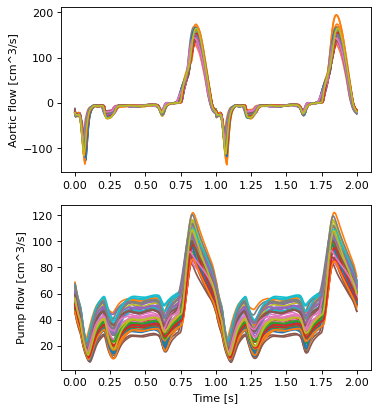

In [5]:
#########
# IMPORTANT BOX
#EXAMPLE ON HOW TO PLOT THE DATA
# you have 6 lists for the 6 validation points.
# Each list contains 30-60 "runs" that vary parameters (sampled with LHS) like EF, HR and the pump parameters.
# I'm assuming you don't need those inputs right now.
# Anyways you have them in the dataframes dk_*
# The data you see here is normalised in time as I required that for comparison purposes.

data=beats_csm8k

fig, axs = plt.subplots(2,1, figsize=(5, 6), dpi=80, facecolor='w', edgecolor='k')#,gridspec_kw={'height_ratios': [1, 1, 1, 1, 1, 0.5]})

axs[0].set_ylabel('Aortic flow [cm^3/s]')
axs[1].set_ylabel('Pump flow [cm^3/s]')
axs[1].set_xlabel('Time [s]')

for run in range(1,len(data)):
    axs[0].plot(data[run-1].index,data[run-1][f"Ao_{run}"])
    axs[1].plot(data[run-1].index,data[run-1][f"VAD_{run}"])
    

In [6]:
##
#Subroutines required to read and calculate the stats from the experimental data.
# They get a little tricky as, e.g. I need to calculate the HR of the signal, which changes.
# I do it more or less automatically using FFT but then I have to manually correct is as it
# might get out of phase through the different beats.

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def compute_stats(df,col, HR_p):

    tin=df["Time"].iloc[0]
    tfin=tin+2*HR_p
    beat=pd.DataFrame(df[(df["Time"]>tin) & (df["Time"]<tfin)][col])
    beat.rename(columns={col: 0}, inplace=True)

    tvec=df[(df["Time"]>0.0) & (df["Time"]<2*HR_p)]["Time"]
    Q_tot=[]
    Q_max=[]
    Q_min=[]
    Q_abs=[]
    Q_out=[]
    Q_in=[]

    tin=tfin
    tfin=tin+2*HR_p
    i=1
    while tfin<df["Time"].iloc[-1]:
        beat[i]=df[(df["Time"]>tin) & (df["Time"]<tfin)][col].reset_index(drop=True)
    
        posflowvec=beat[i].copy()
        negflowvec=beat[i].copy()
        posflowvec[beat[i]<0.0]=0.0
        negflowvec[beat[i]>0.0]=0.0
    
        midpoint=int(len(beat)/2)
        endpoint=len(beat)
        Q_tot.append(scipy.integrate.simps(beat[i][0:midpoint],tvec[0:midpoint]))
        Q_tot.append(scipy.integrate.simps(beat[i][midpoint:endpoint],tvec[midpoint:endpoint]))
        Q_abs.append(scipy.integrate.simps(abs(beat[i][0:midpoint]),tvec[0:midpoint]))
        Q_abs.append(scipy.integrate.simps(abs(beat[i][midpoint:endpoint]),tvec[midpoint:endpoint]))
        Q_out.append(scipy.integrate.simps(posflowvec[0:midpoint],tvec[0:midpoint]))
        Q_out.append(scipy.integrate.simps(posflowvec[midpoint:endpoint],tvec[midpoint:endpoint]))                                                                   
        Q_in.append(scipy.integrate.simps(negflowvec[0:midpoint],tvec[0:midpoint]))
        Q_in.append(scipy.integrate.simps(negflowvec[midpoint:endpoint],tvec[midpoint:endpoint]))
        Q_max.append(beat[i][0:midpoint].max())
        Q_max.append(beat[i][midpoint:endpoint].max())
        Q_min.append(beat[i][0:midpoint].min())
        Q_min.append(beat[i][midpoint:endpoint].min())
    
    
        ## prepare indices
        i=i+1
        tin=tfin
        tfin=tin+2*HR_p

    beat.index=df[(df["Time"]>0.0) & (df["Time"]<2*HR_p)]["Time"]

    beat_work=beat.copy()
    beat["mean"]=beat_work.mean(axis=1)
    beat["std"]=beat_work.std(axis=1)
    beat["min"]=beat_work.loc[:,(beat_work.columns != 'mean') & (beat_work.columns != 'std')].min(axis=1)
    beat["max"]=beat_work.loc[:,(beat_work.columns != 'mean') & (beat_work.columns != 'std')].max(axis=1)
    Q_vals=pd.DataFrame(data={f"{col}_Q_avg":Q_tot,f"{col}_Q_abs":Q_abs,f"{col}_Q_out":Q_out,f"{col}_Q_in":Q_in,f"{col}_Q_min":Q_min,f"{col}_Q_max":Q_max})
    return beat, Q_vals

def HR(df):
    sampling=np.round(1/(df["Time"].iloc[1]-df["Time"].iloc[0]),2)
    freqX = np.fft.fftfreq(len(df["Time"]), 1/sampling)
    Hx = abs(np.fft.fft(df["Ao_F"]+df["LVAD_F"]))

    freq08_ix=np.where(freqX==find_nearest(freqX, 0.8))[0][0]
    freq15_ix=np.where(freqX==find_nearest(freqX, 1.5))[0][0]
    imax=np.where(Hx == max(Hx[freq08_ix:freq15_ix]))
    HR_f=abs(freqX[imax][0])
    HR_p=1/HR_f
    

    ##Freq plot
    if False:
        plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
        plt.minorticks_on()
        plt.grid(which='major', color='#CCCCCC', linestyle='--')
        plt.grid(which='minor', color='#CCCCCC', linestyle=':')
        plt.xlabel("frequency [Hz]")
        plt.ylabel("Energy (abs(fft))")
        plt.xticks(np.arange(0, 10, step=1))
        plt.xlim(0,10)
        plt.plot(freqX,Hx)
    return HR_f, HR_p

def read_karens(filename):
    df = pd.read_csv(filename, skiprows=9, delim_whitespace=True, header=None, decimal=",")#, index_col=0)
    df.columns = ["Time","LV_P", "Ao_P", "Ao_F","LVAD_F"]
    df["Time"]=df["Time"]-df["Time"].iloc[0]
    df=df[df["Time"]<65.0]
    df["Time"]=df["Time"]-df["Time"].iloc[0]

    df["Ao_F"]=df["Ao_F"]-df["LVAD_F"]
    df["Ao_F"]=16.66*df["Ao_F"]
    df["LVAD_F"]=16.66*df["LVAD_F"]
    df.reset_index(inplace=True)
    return df

In [7]:
###
# Reading the experimental data
###

############################################################
#CSM - 0k[rpm]
df_CSM0k=read_karens('rawdata_experimental/csmed_lvadoff.txt')
HR_f_CSM0k,HR_p_CSM0k=HR(df_CSM0k)
HR_p_CSM0k=1/HR_f_CSM0k-0.00145 # HR_p correction through observation
HR_f_CSM0k=1/HR_p_CSM0k

raw_CSM0k_lvadf, stats_CSM0k_lvadf = compute_stats(df_CSM0k,"LVAD_F",HR_p_CSM0k)
raw_CSM0k_aof, stats_CSM0k_aof = compute_stats(df_CSM0k,"Ao_F",HR_p_CSM0k)

############################################################
#CSM - 8k[rpm]
df_CSM8k=read_karens('rawdata_experimental/csmed_lvad8k.txt')
HR_f_CSM8k,HR_p_CSM8k=HR(df_CSM8k)
HR_p_CSM8k=1/HR_f_CSM8k-0.00145 # HR_p correction through observation
HR_f_CSM8k=1/HR_p_CSM8k

raw_CSM8k_lvadf, stats_CSM8k_lvadf = compute_stats(df_CSM8k,"LVAD_F",HR_p_CSM8k)
raw_CSM8k_aof, stats_CSM8k_aof = compute_stats(df_CSM8k,"Ao_F",HR_p_CSM8k)


############################################################
#CSM - 11k[rpm]
df_CSM11k=read_karens('rawdata_experimental/csmed_lvad11k.txt')

HR_f_CSM11k,HR_p_CSM11k=HR(df_CSM11k)
HR_p_CSM11k=1/HR_f_CSM11k-0.00145 # HR_p correction through observation
HR_f_CSM11k=1/HR_p_CSM11k

raw_CSM11k_lvadf, stats_CSM11k_lvadf = compute_stats(df_CSM11k,"LVAD_F",HR_p_CSM11k)
raw_CSM11k_aof, stats_CSM11k_aof = compute_stats(df_CSM11k,"Ao_F",HR_p_CSM11k)

############################################################
#CS11 - 0k[rpm]
df_CS110k=read_karens('rawdata_experimental/cs11_lvadoff.txt')

HR_f_CS110k,HR_p_CS110k=HR(df_CS110k)
HR_p_CS110k=1/HR_f_CS110k-0.0045 # HR_p correction through observation
HR_f_CS110k=1/HR_p_CS110k

raw_CS110k_lvadf, stats_CS110k_lvadf = compute_stats(df_CS110k,"LVAD_F",HR_p_CS110k)
raw_CS110k_aof, stats_CS110k_aof = compute_stats(df_CS110k,"Ao_F",HR_p_CS110k)

############################################################
#CS11 - 8k[rpm]
df_CS118k=read_karens('rawdata_experimental/cs11_lvad8k.txt')

HR_f_CS118k,HR_p_CS118k=HR(df_CS118k)
HR_p_CS118k=1/HR_f_CS118k-0.0045 # HR_p correction through observation
HR_f_CS118k=1/HR_p_CS118k

raw_CS118k_lvadf, stats_CS118k_lvadf = compute_stats(df_CS118k,"LVAD_F",HR_p_CS118k)
raw_CS118k_aof, stats_CS118k_aof = compute_stats(df_CS118k,"Ao_F",HR_p_CS118k)

############################################################
#CS11 - 11k[rpm]
df_CS1111k=read_karens('rawdata_experimental/cs11_lvad11k.txt')

HR_f_CS1111k,HR_p_CS1111k=HR(df_CS1111k)
HR_p_CS1111k=1/HR_f_CS1111k-0.00425 # HR_p correction through observation
HR_f_CS1111k=1/HR_p_CS1111k

raw_CS1111k_lvadf, stats_CS1111k_lvadf = compute_stats(df_CS1111k,"LVAD_F",HR_p_CS1111k)
raw_CS1111k_aof, stats_CS1111k_aof = compute_stats(df_CS1111k,"Ao_F",HR_p_CS1111k)


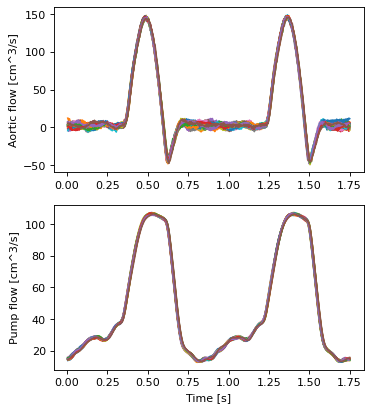

In [8]:
# IMPORTANT BOX
##
# This is an example on how to read the expeirmental data.
# You have 2 lists per validation point: raw_*_aof and raw_*_lvadf
# Each list have multiple beats taken from a single experiment.

data_Ao=raw_CSM8k_aof
data_VAD=raw_CSM8k_lvadf

beats=len(data_Ao.drop(columns=['mean','std','min','max']).columns)

fig, axs = plt.subplots(2,1, figsize=(5, 6), dpi=80, facecolor='w', edgecolor='k')#,gridspec_kw={'height_ratios': [1, 1, 1, 1, 1, 0.5]})

axs[0].set_ylabel('Aortic flow [cm^3/s]')
axs[1].set_ylabel('Pump flow [cm^3/s]')
axs[1].set_xlabel('Time [s]')

for run in range(1,beats):
    axs[0].plot(data_Ao[run-1].index,data_Ao[run-1])
    axs[1].plot(data_VAD[run-1].index,data_VAD[run-1])
    